# Database 

In [1]:
# Import functions and models
from aux import *
# Set seed
seed = 2020

Using TensorFlow backend.


Firsly, the dataset is read using Pandas. The file is supposed to be located in ```../dataset/```.

In [2]:
# Column names
col_names = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
# Reading dataset
dataset = pd.read_csv('../dataset/wdbc.data', header=None, names= col_names)

Display the first 5 rows of the dataset.

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We separate the diagnosys column and drop the identifier (non-predictive variable).

In [4]:
X = dataset.drop(['id','diagnosis'], axis=1)
y = dataset['diagnosis']

We shown the number of Benign and Malign samples.

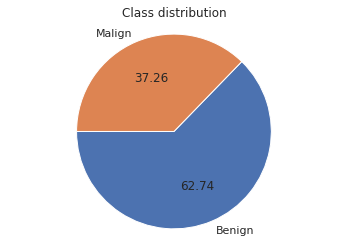

In [5]:
print_class_pie_diagram(y, ["Benign", "Malign"])

# Constants

In [6]:
# Hidden space dimensionality
hidden_space_dim = 2
# Ammount of samples
n_samples = X.shape[0]
# Observed space dimensionality
observed_space_dim = X.shape[1]
# Ammount of classes
n_classes = len(y.unique())
# Hidden layer dimension for Non-linear PCA and VAE
hidden_layer_dim = 100
# Training epochs
num_epochs = 4000
# Learning rate for Adam optimizer
learning_rate = 0.01

# Reduction to 2-dimensional space

## Probabilistic PCA

In [7]:
# create an instance of the P model and the Q model
pca_model = pca(hidden_space_dim, observed_space_dim)
pca_q = Q_pca(hidden_space_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_pca = inf.inference.VI(pca_q, optimizer=optimizer, epochs=num_epochs)

We fit the model using the dataset ```X```.

In [8]:
pca_model.fit({"x": X}, VI_pca)        


 0 epochs	 477290080.0....................
 200 epochs	 469221120.0....................
 400 epochs	 424714240.0....................
 600 epochs	 346995424.0....................
 800 epochs	 280617088.0....................
 1000 epochs	 202567792.0....................
 1200 epochs	 148666800.0....................
 1400 epochs	 117842656.0....................
 1600 epochs	 81712848.0....................
 1800 epochs	 57798524.0....................
 2000 epochs	 45126264.0....................
 2200 epochs	 35366024.0....................
 2400 epochs	 25201190.0....................
 2600 epochs	 20702816.0....................
 2800 epochs	 15813233.0....................
 3000 epochs	 11552438.0....................
 3200 epochs	 9772911.0....................
 3400 epochs	 7383702.5....................
 3600 epochs	 6897999.5....................
 3800 epochs	 5881258.0....................

The evolution of the loss function over the training is:

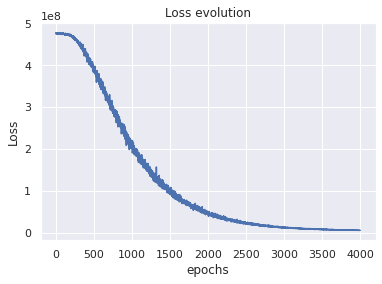

In [9]:
print_loss_function(VI_pca)

We plot the posterior using the learned model and the data.

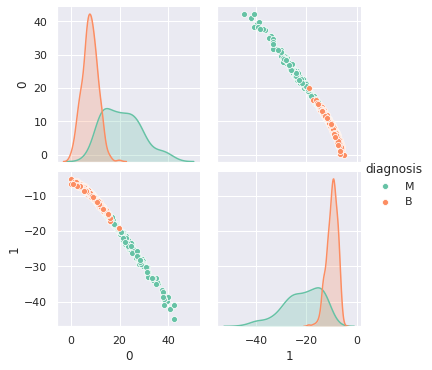

In [10]:
z = pca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

We can obtain the transformation by taking the posterior distribution of ```w``` and ```w0```.

In [11]:
post = pca_model.posterior("w").parameters()
print("Loc:", post["loc"])
print("Scale:", post["scale"])

Loc: [[-1.3462617e-02 -1.1266519e+00 -5.4251373e-01  2.3237587e+01
  -3.0959155e-03  3.3941811e-03 -5.4353504e-03  1.1586812e-03
   7.6288837e-03  3.8523693e-04 -1.4686738e-02 -8.7129377e-02
  -1.2195053e-01  1.6765001e+00  5.2341195e-03  7.1557367e-04
   7.9438621e-03 -1.9351284e-03  5.2416464e-03  3.4552331e-03
  -3.6113814e-02 -1.6754674e+00  6.3855195e-01  3.2523571e+01
  -1.7594688e-03  1.1383238e-02  7.4471286e-03  7.1955863e-03
  -2.5873533e-03  2.1621725e-04]
 [-4.9971345e-01 -1.5180540e+00 -5.4470978e+00 -2.3154955e+01
   6.4939368e-03 -4.2493184e-04 -4.8887887e-04 -1.3210115e-03
  -1.2055855e-02  2.9022649e-03 -4.1398160e-02 -1.0033873e-01
  -3.2286423e-01 -2.3115437e+00 -1.3697683e-04 -3.0497069e-04
  -8.2985451e-03  4.2169616e-03 -4.3240758e-03  2.4505695e-03
  -7.0548862e-01 -2.2684877e+00 -5.4890509e+00 -3.2090355e+01
   3.3728634e-03 -9.2493845e-03 -1.1429688e-02  3.6149216e-03
   3.0752481e-03 -1.0839745e-04]]
Scale: [[0.00765379 0.00880301 0.03353995 0.3271003  0.00713

In [12]:
post = pca_model.posterior("w0").parameters()
print("Loc:", post["loc"])
print("Scale:", post["scale"])

Loc: [ 7.20404053e+00  1.28114491e+01  1.50272999e+01  1.33012619e+01
  9.85398889e-02  5.36410883e-02 -2.31098346e-02 -9.43324529e-03
  1.74646497e-01  6.49043471e-02 -8.41970555e-03  1.08870995e+00
 -1.01196624e-01 -1.11464033e+01  1.45823648e-02  2.11177021e-02
  3.78840230e-02  2.27718754e-03  2.73804702e-02  5.86319715e-03
  6.65510941e+00  1.49732580e+01  1.33374662e+01  1.68693027e+01
  1.16442516e-01  1.39579862e-01  7.47959018e-02  3.83533984e-02
  2.64939398e-01  8.90643820e-02]
Scale: [0.16430327 0.19884394 0.5973971  1.0175865  0.07380689 0.07132629
 0.06478463 0.07253737 0.07722838 0.06500819 0.06678006 0.06581404
 0.0706616  0.33337653 0.07066071 0.06741256 0.07111169 0.0641744
 0.06654743 0.0676294  0.16649447 0.24378394 0.61945194 1.3012828
 0.06926628 0.06850383 0.07417676 0.07279255 0.07085041 0.06573635]


### Test Separability

We train an SVM to learn the dataset before and after applying the reduction, scores are shown below.

In [13]:
test_separability(X,z,y)

SVM score in observed space: 0.9226713532513181
SVM score in hidden space: 0.9068541300527241


## Non-linear PCA

In [14]:
# create an instance of the P model and the Q model
nlpca_model = nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)
nlpca_q = Q_nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_nlpca = inf.inference.VI(nlpca_q, optimizer=optimizer, epochs=num_epochs)

In [15]:
nlpca_model.fit({"x": X}, VI_nlpca)        


 0 epochs	 499985440.0....................
 200 epochs	 165804400.0....................
 400 epochs	 64896552.0....................
 600 epochs	 27648806.0....................
 800 epochs	 21993270.0....................
 1000 epochs	 24675022.0....................
 1200 epochs	 17578378.0....................
 1400 epochs	 17982144.0....................
 1600 epochs	 9160896.0....................
 1800 epochs	 11462085.0....................
 2000 epochs	 8836879.0....................
 2200 epochs	 7386131.0....................
 2400 epochs	 6213963.0....................
 2600 epochs	 4718585.0....................
 2800 epochs	 5529480.0....................
 3000 epochs	 4681849.5....................
 3200 epochs	 3960648.25....................
 3400 epochs	 4729021.5....................
 3600 epochs	 3901507.5....................
 3800 epochs	 4126617.5....................

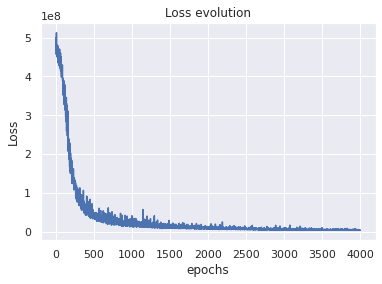

In [16]:
print_loss_function(VI_nlpca)

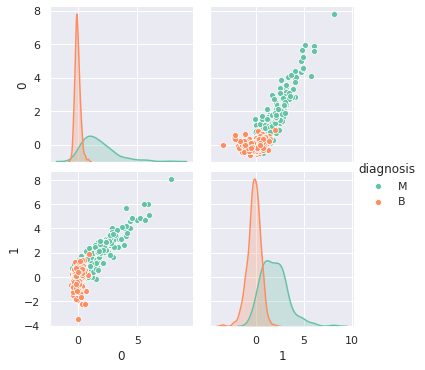

In [17]:
z = nlpca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

### Test Separability

In [18]:
test_separability(X,z,y)

SVM score in observed space: 0.9226713532513181
SVM score in hidden space: 0.9173989455184535


## Variational auto-encoder

In [19]:
vae_model = vae(hidden_space_dim, hidden_layer_dim, observed_space_dim)
q_vae = Q_vae(hidden_space_dim , hidden_layer_dim, observed_space_dim)

optimizer = tf.train.AdamOptimizer(learning_rate)
VI_vae = inf.inference.VI(q_vae, optimizer=optimizer, epochs=num_epochs)

In [20]:
vae_model.fit({"x": X}, VI_vae)


 0 epochs	 460100608.0....................
 200 epochs	 6446979.5....................
 400 epochs	 2009974.625....................
 600 epochs	 1447588.875....................
 800 epochs	 1034644.0....................
 1000 epochs	 867977.8125....................
 1200 epochs	 718414.375....................
 1400 epochs	 638882.5....................
 1600 epochs	 6567813.5....................
 1800 epochs	 510794.375....................
 2000 epochs	 474669.59375....................
 2200 epochs	 456068.125....................
 2400 epochs	 410768.78125....................
 2600 epochs	 383926.4375....................
 2800 epochs	 362848.9375....................
 3000 epochs	 346045.78125....................
 3200 epochs	 355736.71875....................
 3400 epochs	 310010.125....................
 3600 epochs	 295817.125....................
 3800 epochs	 282014.40625....................

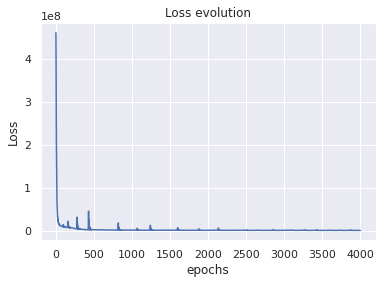

In [21]:
print_loss_function(VI_vae)

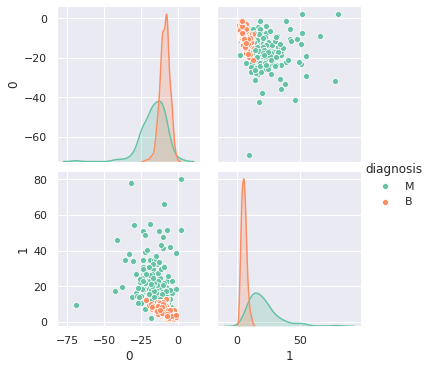

In [22]:
z = vae_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

### Test Separability


In [23]:
test_separability(X,z,y)

SVM score in observed space: 0.9226713532513181
SVM score in hidden space: 0.9244288224956063


# Reduction to 3-dimensional space

We set the hidden space to be 3-dimensional.

In [24]:
hidden_space_dim = 3

## Probabilistic PCA

In [25]:
# create an instance of the P model and the Q model
pca_model = pca(hidden_space_dim, observed_space_dim)
pca_q = Q_pca(hidden_space_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_pca = inf.inference.VI(pca_q, optimizer=optimizer, epochs=num_epochs)
# Training
pca_model.fit({"x": X}, VI_pca)        


 0 epochs	 476971008.0....................
 200 epochs	 465700960.0....................
 400 epochs	 393581120.0....................
 600 epochs	 307269280.0....................
 800 epochs	 219480976.0....................
 1000 epochs	 151619568.0....................
 1200 epochs	 101955000.0....................
 1400 epochs	 70283200.0....................
 1600 epochs	 47279096.0....................
 1800 epochs	 32140498.0....................
 2000 epochs	 21992054.0....................
 2200 epochs	 16643462.0....................
 2400 epochs	 12605917.0....................
 2600 epochs	 9080524.0....................
 2800 epochs	 8350839.0....................
 3000 epochs	 7632053.5....................
 3200 epochs	 5597346.5....................
 3400 epochs	 5159503.5....................
 3600 epochs	 4504351.5....................
 3800 epochs	 4110307.0....................

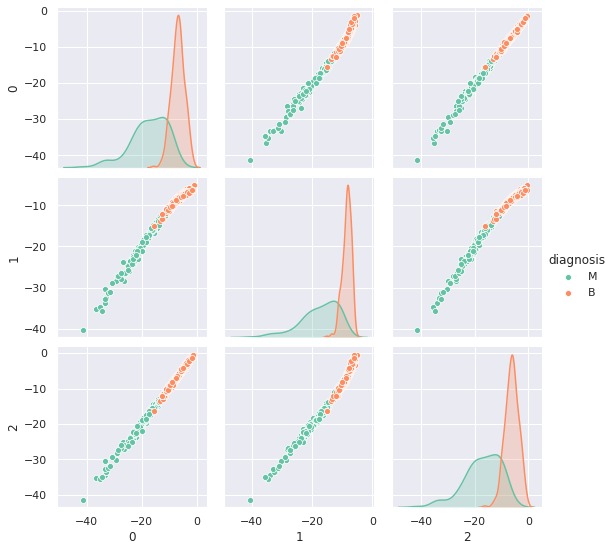

In [26]:
z = pca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

In [27]:
test_separability(X,z,y)

SVM score in observed space: 0.9226713532513181
SVM score in hidden space: 0.9121265377855887


## Non-linear PCA

In [28]:
# create an instance of the P model and the Q model
nlpca_model = nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)
nlpca_q = Q_nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_nlpca = inf.inference.VI(nlpca_q, optimizer=optimizer, epochs=num_epochs)
# Training
nlpca_model.fit({"x": X}, VI_nlpca)


 0 epochs	 484531712.0....................
 200 epochs	 117407056.0....................
 400 epochs	 50044220.0....................
 600 epochs	 37668580.0....................
 800 epochs	 23517360.0....................
 1000 epochs	 20955748.0....................
 1200 epochs	 17485050.0....................
 1400 epochs	 17212236.0....................
 1600 epochs	 9792567.0....................
 1800 epochs	 8824261.0....................
 2000 epochs	 9588235.0....................
 2200 epochs	 9803935.0....................
 2400 epochs	 8781378.0....................
 2600 epochs	 13078555.0....................
 2800 epochs	 7138571.0....................
 3000 epochs	 4915826.0....................
 3200 epochs	 5720979.5....................
 3400 epochs	 3882630.25....................
 3600 epochs	 3445786.0....................
 3800 epochs	 3122698.5....................

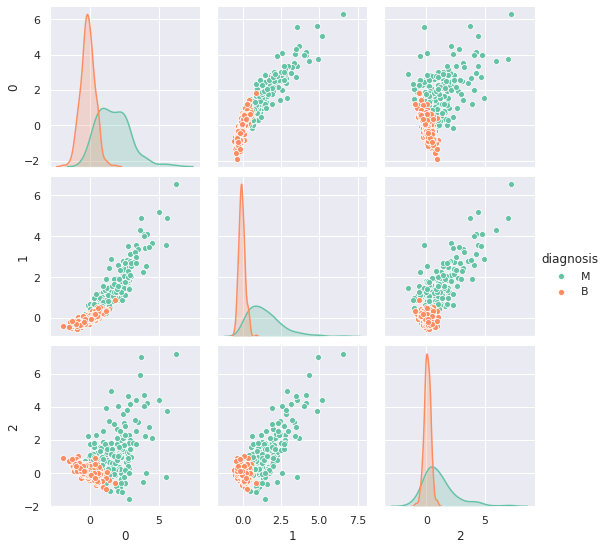

In [29]:
z = nlpca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

In [30]:
test_separability(X,z,y)

SVM score in observed space: 0.9226713532513181
SVM score in hidden space: 0.929701230228471


## Variational auto-encoder

In [31]:
vae_model = vae(hidden_space_dim, hidden_layer_dim, observed_space_dim)
q_vae = Q_vae(hidden_space_dim , hidden_layer_dim, observed_space_dim)

optimizer = tf.train.AdamOptimizer(learning_rate)
VI_vae = inf.inference.VI(q_vae, optimizer=optimizer, epochs=num_epochs)
vae_model.fit({"x": X}, VI_vae)


 0 epochs	 477933280.0....................
 200 epochs	 3621736.75....................
 400 epochs	 2172315.25....................
 600 epochs	 1565140.125....................
 800 epochs	 1000079.0625....................
 1000 epochs	 858826.0625....................
 1200 epochs	 747481.0....................
 1400 epochs	 562349.875....................
 1600 epochs	 504368.90625....................
 1800 epochs	 475516.46875....................
 2000 epochs	 390042.625....................
 2200 epochs	 360512.625....................
 2400 epochs	 329659.03125....................
 2600 epochs	 310335.71875....................
 2800 epochs	 505416.28125....................
 3000 epochs	 252302.921875....................
 3200 epochs	 235854.734375....................
 3400 epochs	 227563.9375....................
 3600 epochs	 207653.3125....................
 3800 epochs	 198891.265625....................

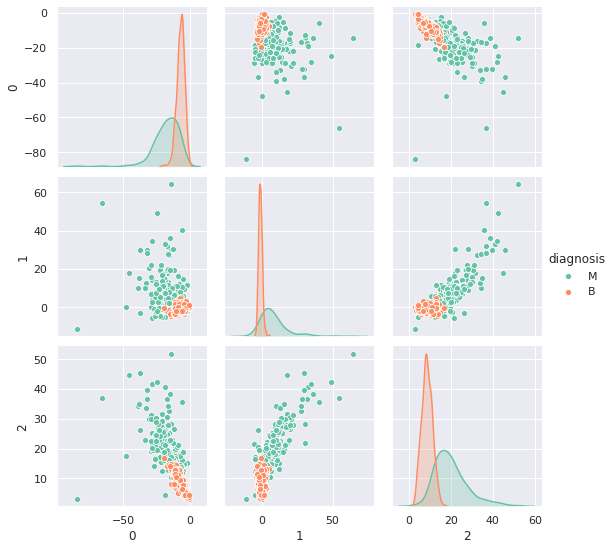

In [32]:
z = vae_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

In [33]:
test_separability(X,z,y)

SVM score in observed space: 0.9226713532513181
SVM score in hidden space: 0.9279437609841827
